# 演習問題 : iris
irisデータを基本分析して、データを把握しなさい。  
Petal : 「がく片」の幅について、3種類の群の分散が等しいか検定しなさい  
種別(Species)のがく片の幅(Sepal.Width)を，一元配置・分析分散分析しなさい  
3種で多重比較を行をしなさい  

データセット ：iris  
FisherとAndersonによるアヤメ分類のデータセット(Rに組み込まれている)  

Species : setosa, versicolor, virginicaの3種類  
Sepal : 「がく片」の長さと幅  
Petal : 「花弁」の長さと幅  
データ数：150 (3種のデータが50個ずつ)  

## データ取り込み

In [1]:
data(iris)
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [2]:
#個数確認
nrow(iris)

[1] 150

In [3]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

## boxplotを描画

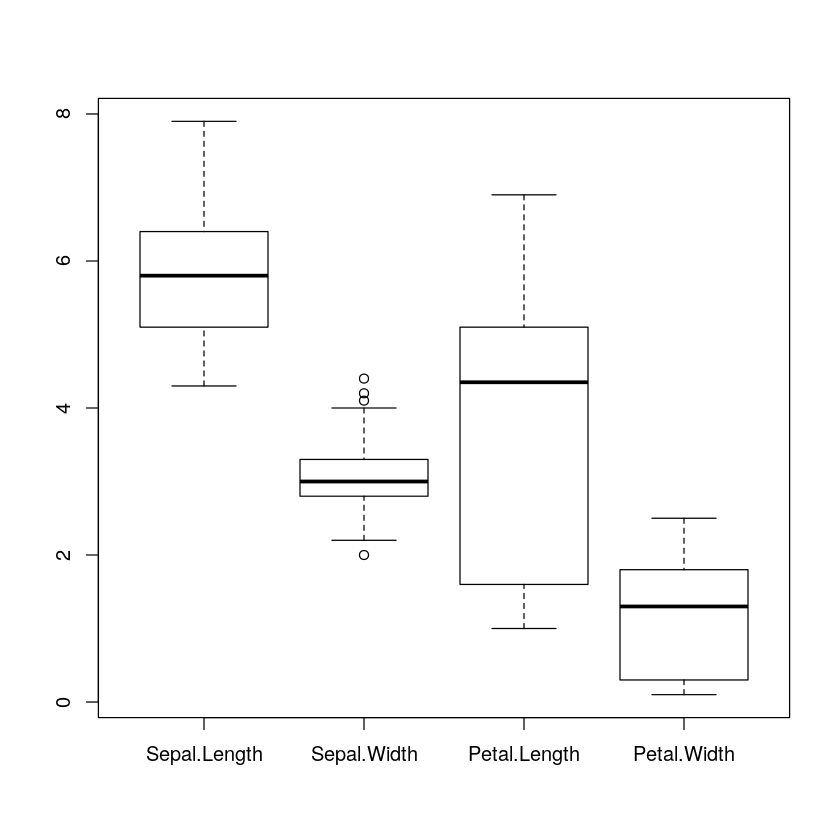

In [5]:
boxplot(iris[,1:4])

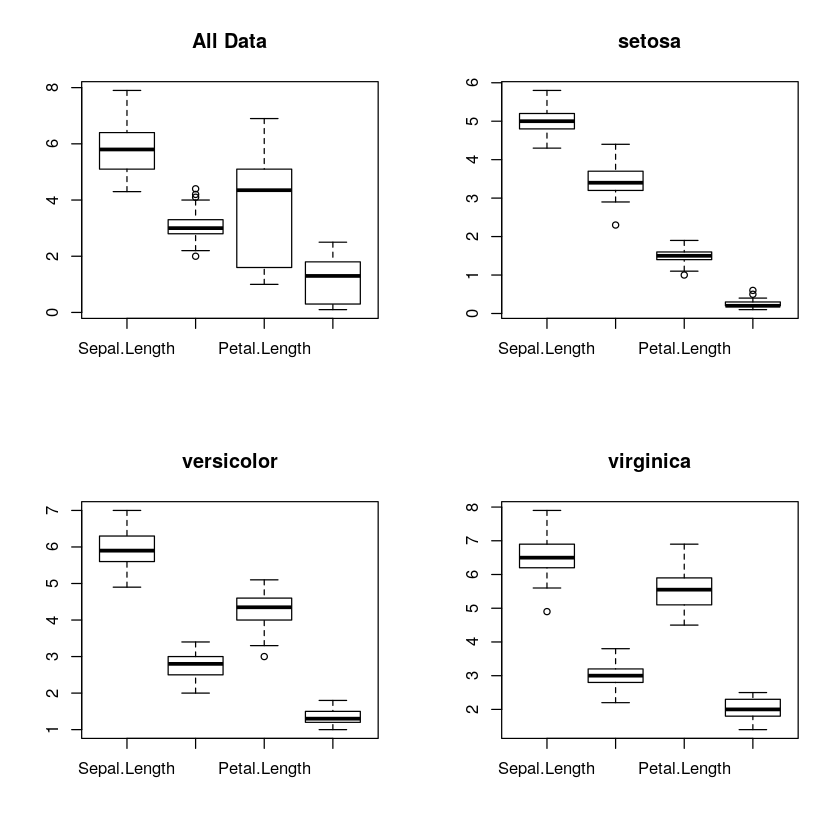

In [6]:
par(mfrow=c(2,2)) 
#boxplotを描画
boxplot(iris[,1:4], main="All Data")
boxplot(iris[iris$Species=="setosa",1:4], main="setosa")
boxplot(iris[iris$Species=="versicolor",1:4], main="versicolor")
boxplot(iris[iris$Species=="virginica",1:4], main="virginica")

## 散布図

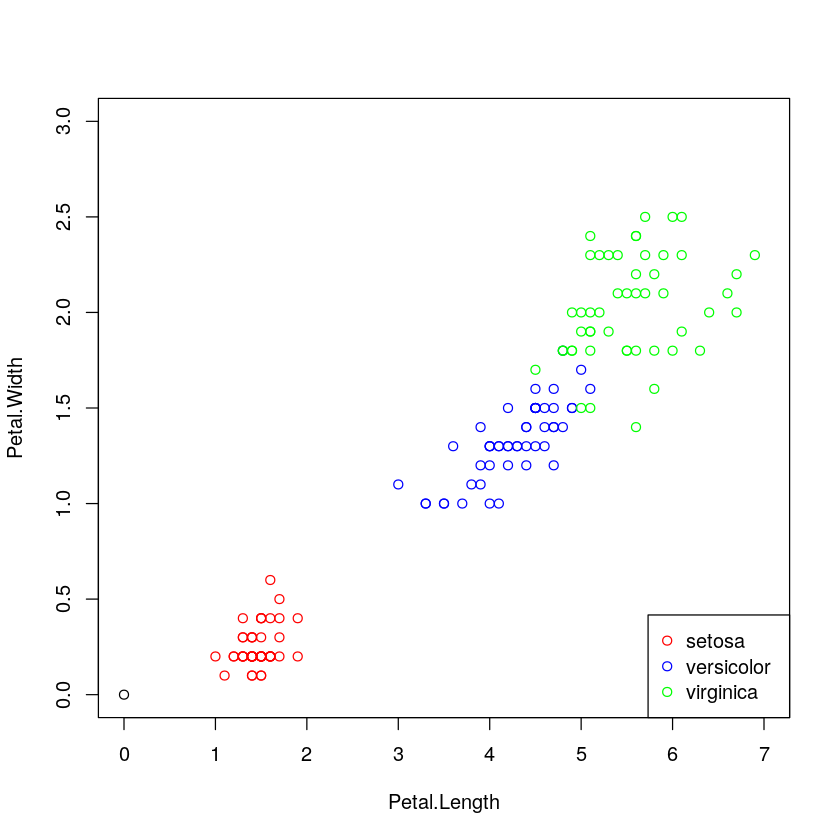

In [7]:
plot(0, 0, xlim = c(0, 7), ylim = c(0, 3),xlab = "Petal.Length", ylab = "Petal.Width")
points(iris[iris$Species=="setosa",3],iris[iris$Species=="setosa",4], col = "red", pch = 1)
points(iris[iris$Species=="versicolor",3],iris[iris$Species=="versicolor",4], col = "blue", pch = 1)
points(iris[iris$Species=="virginica",3],iris[iris$Species=="virginica",4], col = "green", pch = 1)
legend("bottomright", legend = c("setosa", "versicolor","virginica"), pch = c(1, 1,1), col = c("red", "blue","green"))

## 相関係数行列を求める

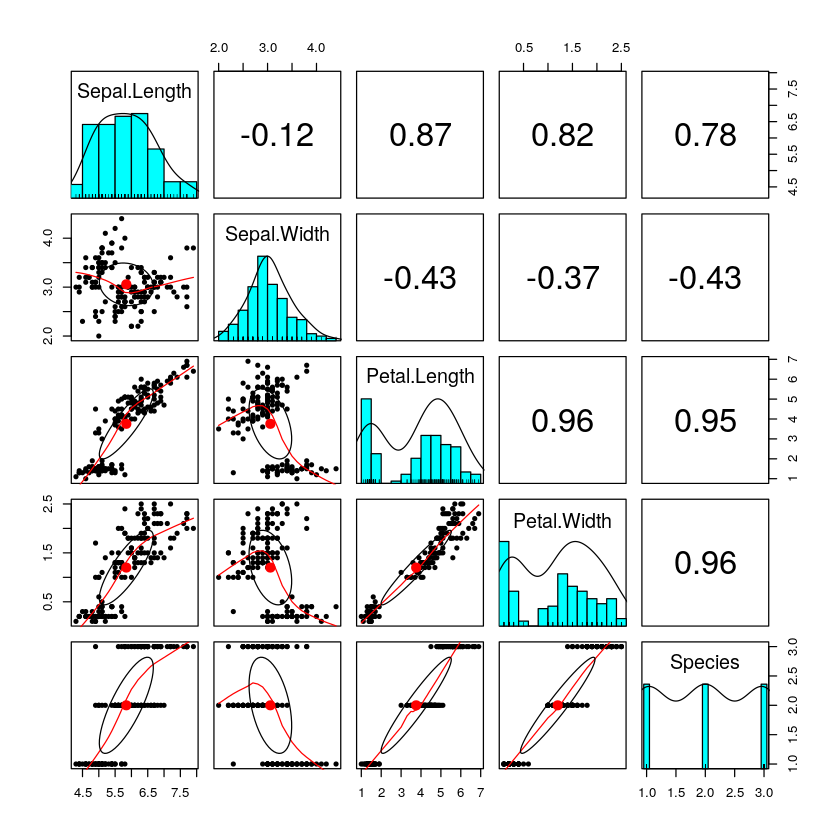

In [8]:
library(psych)
pairs.panels(iris)

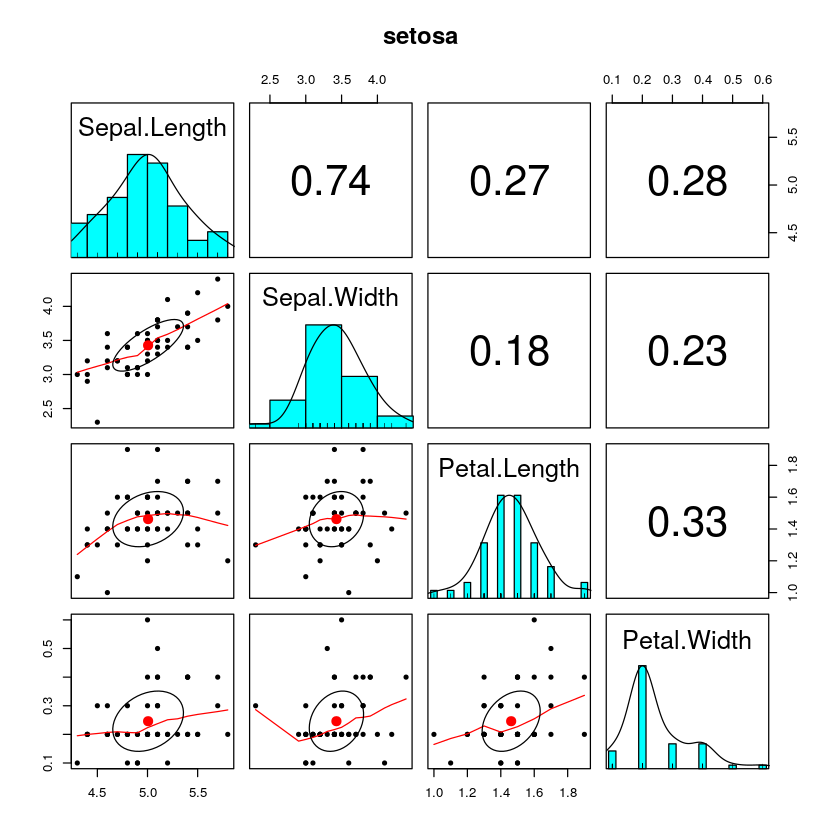

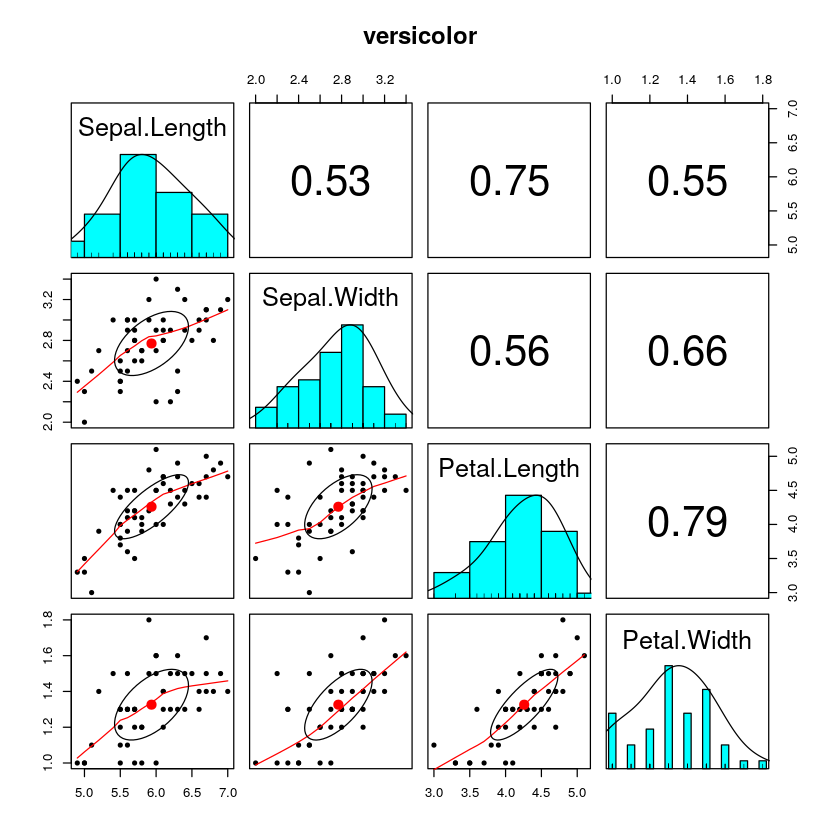

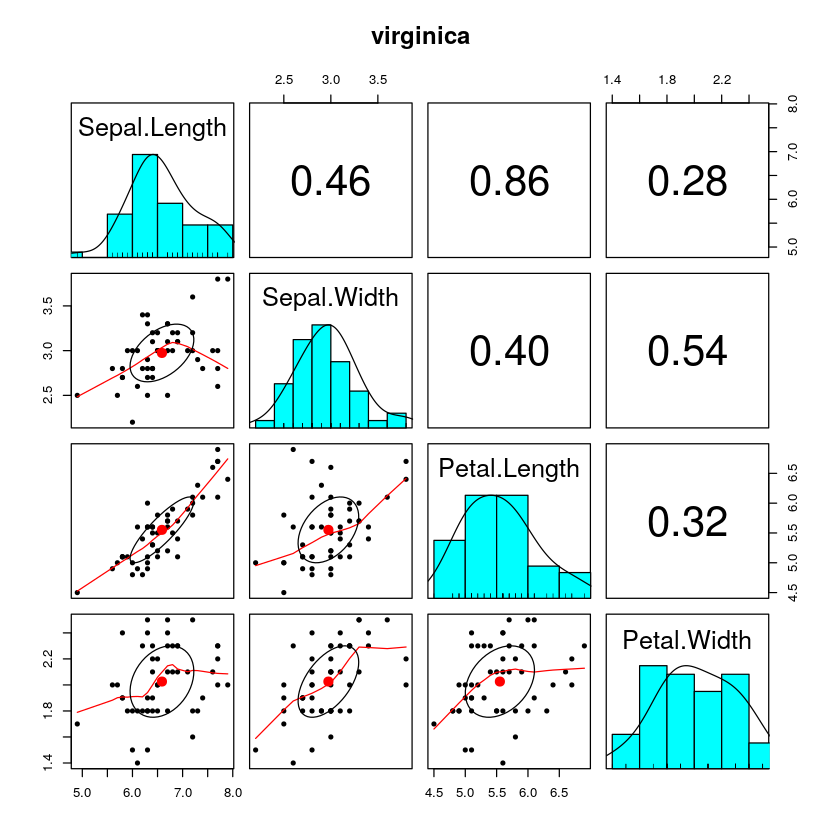

In [9]:
pairs.panels(iris[iris$Species=="setosa",1:4], main="setosa")
pairs.panels(iris[iris$Species=="versicolor",1:4], main="versicolor")
pairs.panels(iris[iris$Species=="virginica",1:4], main="virginica")

## 主成分分析
PC1:花弁と萼片の長さが大きい  
PC2:萼片の幅が大きい

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

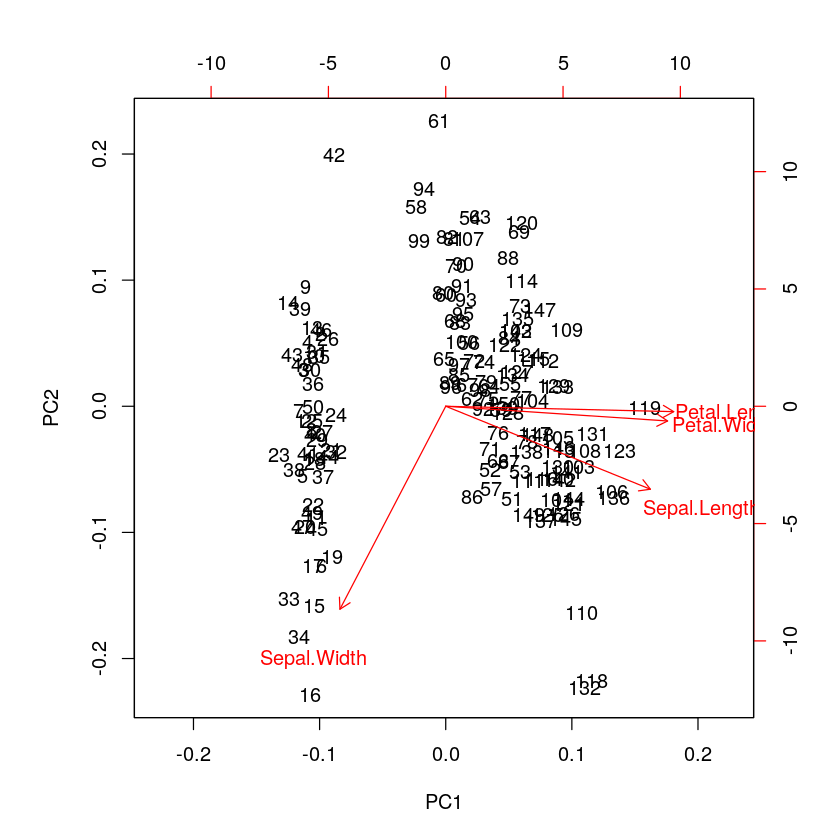

In [10]:
pca = prcomp(iris[,1:4], scale=T)
pca
summary(pca)
biplot(pca)

## Sepal : 「がく片」の幅について、3種類の群の分散が等しいか検定する。
p値 > 0.05 であるので各水準の分散は等しい  
等分散を仮定した一元配置分析分散分析、多重比較を実施する

In [11]:
bartlett.test(iris$Sepal.Width ~ iris$Species)


	Bartlett test of homogeneity of variances

data:  iris$Sepal.Width by iris$Species
Bartlett's K-squared = 2.0911, df = 2, p-value = 0.3515


## 「等分散性を仮定した」，種別(Species)のがく片の幅(Sepal.Width)を，一元配置分散分析する

帰無仮説：３つの種の母平均は等しい  
対立仮説：少なくとも一つの種の母平均が他の種の母平均と異なる  
p < 0.05より、帰無仮説は棄却され、対立仮説を採用 

In [12]:
oneway.test(iris$Sepal.Width ~ iris$Species, var.equal = TRUE)


	One-way analysis of means

data:  iris$Sepal.Width and iris$Species
F = 49.16, num df = 2, denom df = 147, p-value < 2.2e-16


## 3種で「等分散を仮定した」多重比較を行う。
結果より  
VirginicaとSetosaには有意な差がある  
VersicolorとSetosaには有意な差がある  
VirginicaとVertsicolorには有意な差がある

In [13]:
pairwise.t.test(iris$Sepal.Width , iris$Species, p.adjust.method = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  iris$Sepal.Width and iris$Species 

           setosa  versicolor
versicolor < 2e-16 -         
virginica  1.4e-09 0.0094    

P value adjustment method: bonferroni 

# 5章演習問題 : iris

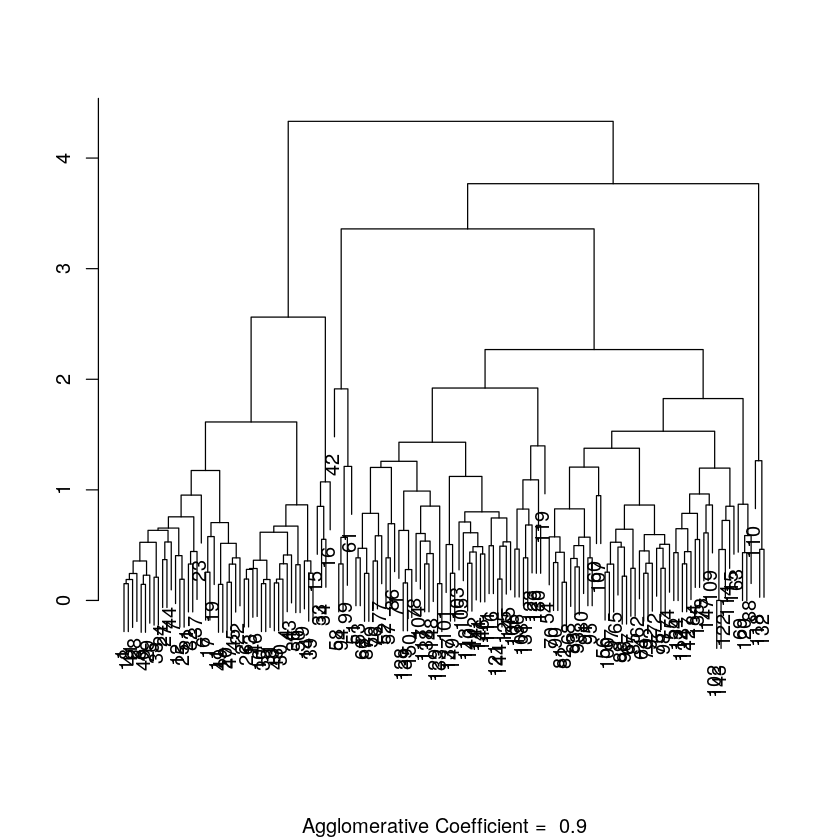

In [14]:
#階層型手法(凝集型階層)
library(cluster)
cluster.agnes <- agnes(iris[,1:4], stand = T)
plot(cluster.agnes, which = 2, main = "", xlab = "", ylab = "")

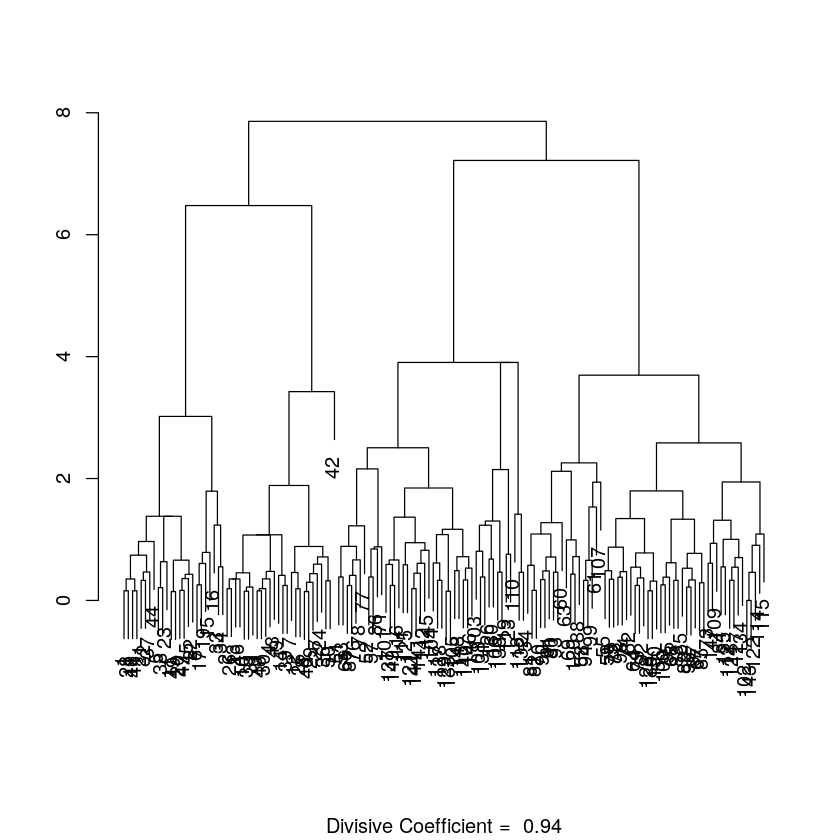

In [15]:
#区分型階層(全体から区分していく）
cluster.diana <- diana(iris[,1:4], stand = T) 
plot(cluster.diana, which = 2, main = "", xlab = "", ylab = "") 

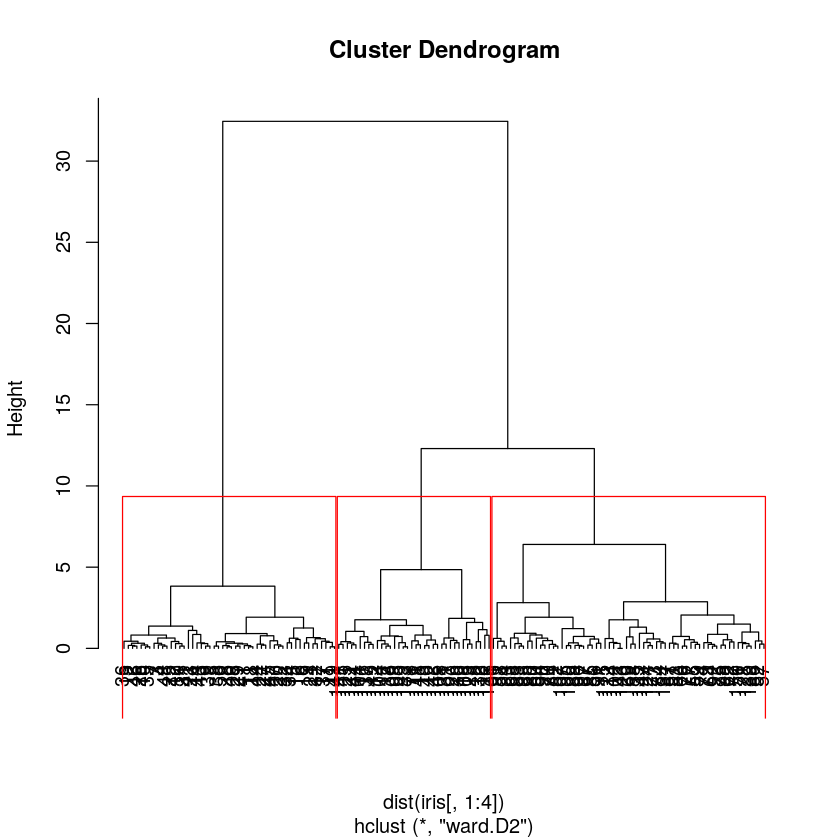

In [16]:
#区切りを入力
cluster.h <- hclust(dist(iris[,1:4]), method = "ward.D2")
plot(cluster.h, hang=-1) 
rect.hclust(cluster.h, k = 3, border = "red") 

In [17]:
#k-means法
set.seed(123)
cluster.kmeans = kmeans(iris[,1:4], 3)
cluster.kmeans$cluster
table(cluster.kmeans$cluster)
cluster.kmeans$centers

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3


 1  2  3 
50 38 62 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053
3,5.901613,2.748387,4.393548,1.433871


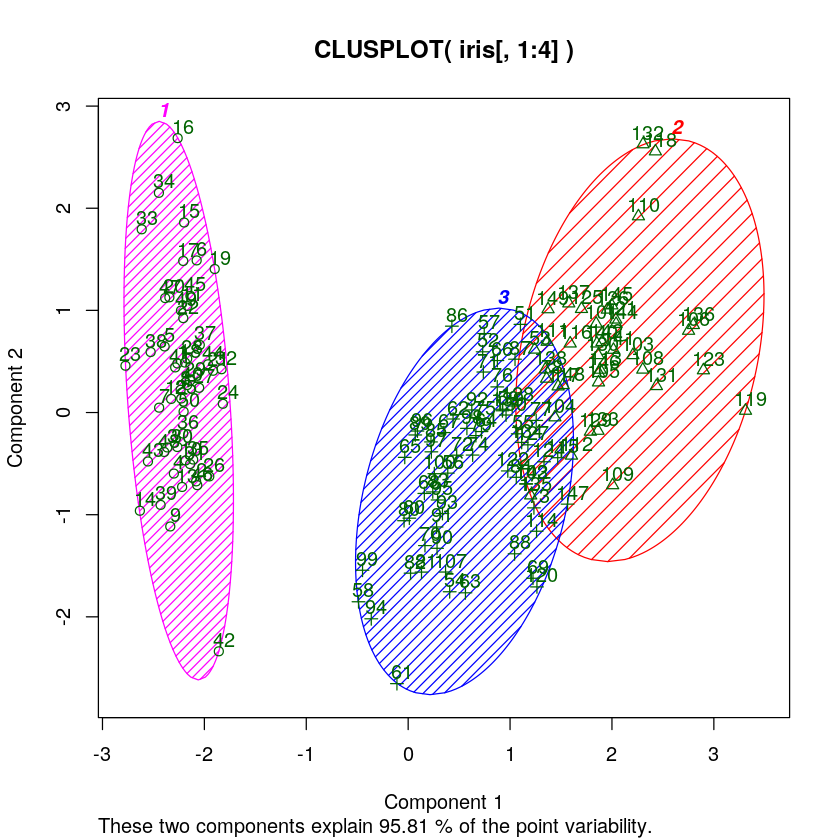

In [18]:
clusplot(iris[,1:4], cluster.kmeans$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)